In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [130]:
# 데이터 불러오기 
# index_col=0 : 0번 열을 index로. 여기선 0번열이 pregnancies니까 없이
df = pd.read_csv("../dataset/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [131]:
# 컬렴명 확인
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [132]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Text(0.5, 1.0, 'Label')

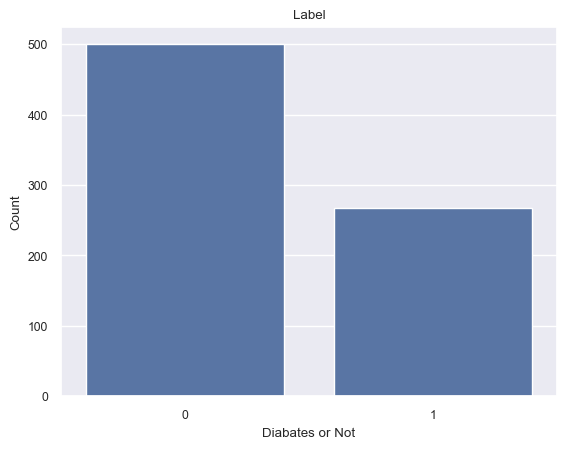

In [133]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Outcome")
plt.xlabel("Diabates or Not")
plt.ylabel("Count")
plt.title("Label")

In [134]:
# 레이블 갯수 확인 (숫자) ** 중요
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

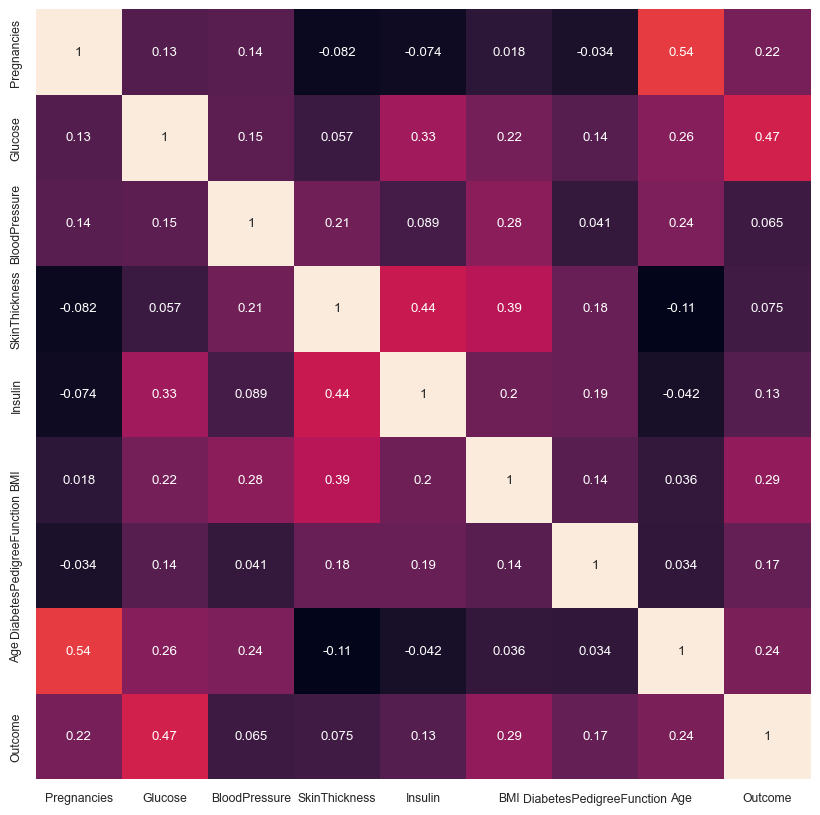

In [135]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# label인 outcome과 가장 큰 상관관계? 혈당, bmi, 나이, 임신순

In [136]:
# 결측치 확인 -> df.info 결과 null값 존재 X -> 0이 결측치로 확인됨
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

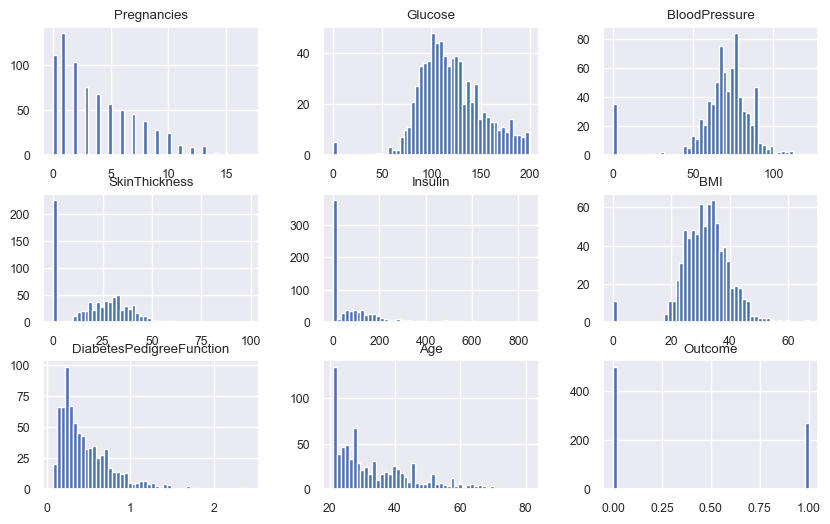

In [137]:
df.hist(bins=50, figsize=(10, 6))

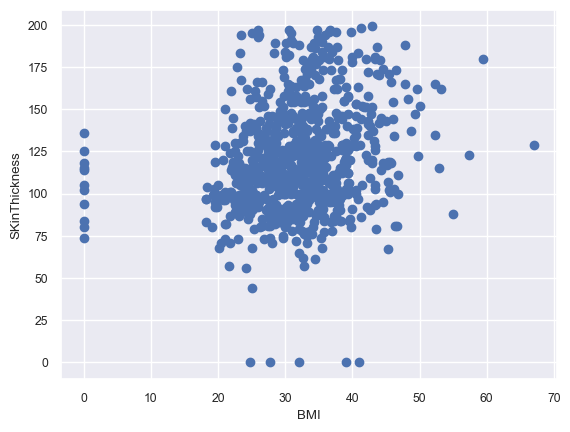

In [138]:
# 산점도 확인 (둘의 관계)

plt.scatter(df['BMI'], df['Glucose'])
plt.xlabel('BMI')
plt.ylabel('SKinThickness')

plt.show()

In [139]:
# 혈당, 혈압, 피부두께, 체질량지수가 0으로 나오는 값 : 이상치로 판단
# 인슐린 -> 0일수도있지만, 너무 많음. 이상치로 판단
# 피부두께도 너무 많음. 
print("제거 전: ", len(df))
df = df[(df[['Glucose', 'BloodPressure','BMI']] != 0).all(axis=1)]
print("제거 후: ", len(df))

제거 전:  768
제거 후:  724


In [140]:
# 0값을 nan으로 대체. (평균으로 바꾸기위해 ) 
df[['SkinThickness', 'Insulin']] = df[['SkinThickness', 'Insulin']].replace(0, np.nan)

# SkinThickness와 Insulin의 NaN 값을 평균값으로 대체
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())

/var/folders/nr/9d9y7mfn50b3sc_ncv28vstc0000gn/T/ipykernel_19838/897862106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['SkinThickness', 'Insulin']] = df[['SkinThickness', 'Insulin']].replace(0, np.nan)
/var/folders/nr/9d9y7mfn50b3sc_ncv28vstc0000gn/T/ipykernel_19838/897862106.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
/var/folders/nr/9d9y7mfn50b3sc_ncv28vstc0000gn/T/ipykernel_19838/897862106.py:6: SettingWithCo

In [141]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,156.056122,33.6,0.627,50,1
1,1,85,66,29.000000,156.056122,26.6,0.351,31,0
2,8,183,64,29.182331,156.056122,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,156.056122,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,29.182331,156.056122,30.1,0.349,47,1


In [142]:
y = df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 724, dtype: int64

In [143]:
X = df.drop('Outcome',axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35.000000,156.056122,33.6,0.627,50
1,1,85,66,29.000000,156.056122,26.6,0.351,31
2,8,183,64,29.182331,156.056122,23.3,0.672,32
3,1,89,66,23.000000,94.000000,28.1,0.167,21
4,0,137,40,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63
764,2,122,70,27.000000,156.056122,36.8,0.340,27
765,5,121,72,23.000000,112.000000,26.2,0.245,30
766,1,126,60,29.182331,156.056122,30.1,0.349,47


In [144]:
from sklearn.model_selection import train_test_split

# 훈련데이터와 테스트 데이터로 분할 
# 먼저 학습 검증 세트와 테스트 세트를 분리합니다 (80% 학습+검증, 20% 테스트)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# 그 다음 학습+검증 세트를 다시 학습 세트와 검증 세트로 분리합니다 (80%의 80%는 학습, 80%의 20%는 검증)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=0)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [145]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
val_scaled = ss.transform(X_val)
test_scaled = ss.transform(X_test)

In [146]:
# 모델 정의

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(8,activation='relu',input_shape=(8,)))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])

model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,303 (5.09 KB)

 Trainable params: 1,303 (5.09 KB)

 Non-trainable params: 0 (0.00 B)

In [147]:
history = model.fit(train_scaled, y_train, epochs=30, batch_size=64, validation_data=(val_scaled, y_val), verbose=True, shuffle=True)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3465 - loss: 0.7232 - val_accuracy: 0.5086 - val_loss: 0.6860
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5681 - loss: 0.6910 - val_accuracy: 0.6293 - val_loss: 0.6711
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6801 - loss: 0.6650 - val_accuracy: 0.6207 - val_loss: 0.6603
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6875 - loss: 0.6432 - val_accuracy: 0.6121 - val_loss: 0.6509
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6552 - loss: 0.6386 - val_accuracy: 0.6121 - val_loss: 0.6418
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6896 - loss: 0.6120 - val_accuracy: 0.6121 - val_loss: 0.6301
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6815 - loss: 0.5987 - val_accuracy: 0.6121 - val_loss: 0.6190
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6653 - loss: 0.5899 - val_accuracy: 0.6121 - val_loss: 0.6085
Epoch 9

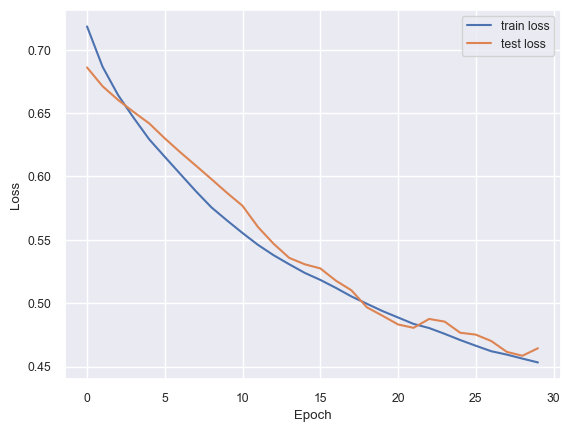

In [148]:
plt.plot(range(30), history.history['loss'], label='train loss')
plt.plot(range(30), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

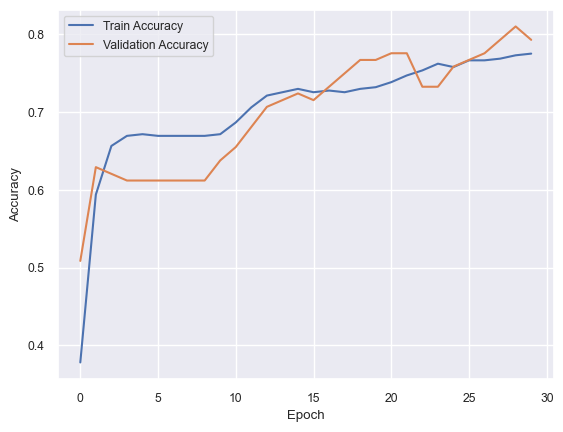

In [172]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [180]:
# 성능평가
from sklearn.metrics import classification_report,confusion_matrix

# 모델 예측
y_pred = model.predict(test_scaled)

# 이진 분류 문제에서는 0.5를 기준으로 0과 1로 변환
y_pred_class = (y_pred > 0.5).astype(int)

print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        97
           1       0.62      0.67      0.64        48

    accuracy                           0.75       145
   macro avg       0.72      0.73      0.73       145
weighted avg       0.76      0.75      0.75       145

[[77 20]
 [16 32]]


In [182]:
# 순서대로 정밀도,  재현율, 조화평균, ..